In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile
from scipy.fft import fft, fftfreq, rfft, rfftfreq, irfft
from scipy import signal
import os
from scipy.io.wavfile import write

In [2]:
sampling_rate, data = wavfile.read('noisy_tlou.wav')

In [3]:
def plotAll(sampling_rate, data, name):
    freqs = rfftfreq(len(data), 1/sampling_rate)
    time = range(len(data))
    fig, axs = plt.subplots(3, 1, figsize=(10, 20))
    # plotting wave based on time
    axs[0].plot(time, data)
    axs[0].set_xlabel('Time(s)')
    axs[0].set_ylabel('Amplitude')
    axs[0].set_title(f"waveform of {name} song")

    fft_data = rfft(data)    # real fast fourier transform
    amplitudes = np.abs(fft_data)
    # plotting fourier transform based on frequency
    axs[1].plot(freqs, amplitudes)
    axs[1].set_xlabel('Frequency(Hz)')
    axs[1].set_ylabel('Amplitude')
    axs[1].set_title(f'Fourier transform of {name} song')
    # plotting spectogram
    freq, time_spec, spectrogram = signal.spectrogram(data, fs=sampling_rate, 
                                               nfft=2000, window=signal.windows.hann(2000),
                                               scaling='spectrum')

    spec = axs[2].pcolormesh(time_spec, freq, 10*np.log10(spectrogram))
    axs[2].set_xlabel('Time(s)')
    axs[2].set_ylabel('Frequency(Hz)')
    axs[2].set_title(f'Spectrogram of {name} song')
    plt.colorbar(spec, ax=axs[2], label='Power/frequency [dB/Hz]', orientation='vertical')
    plt.savefig(f"{name}_plot.png")

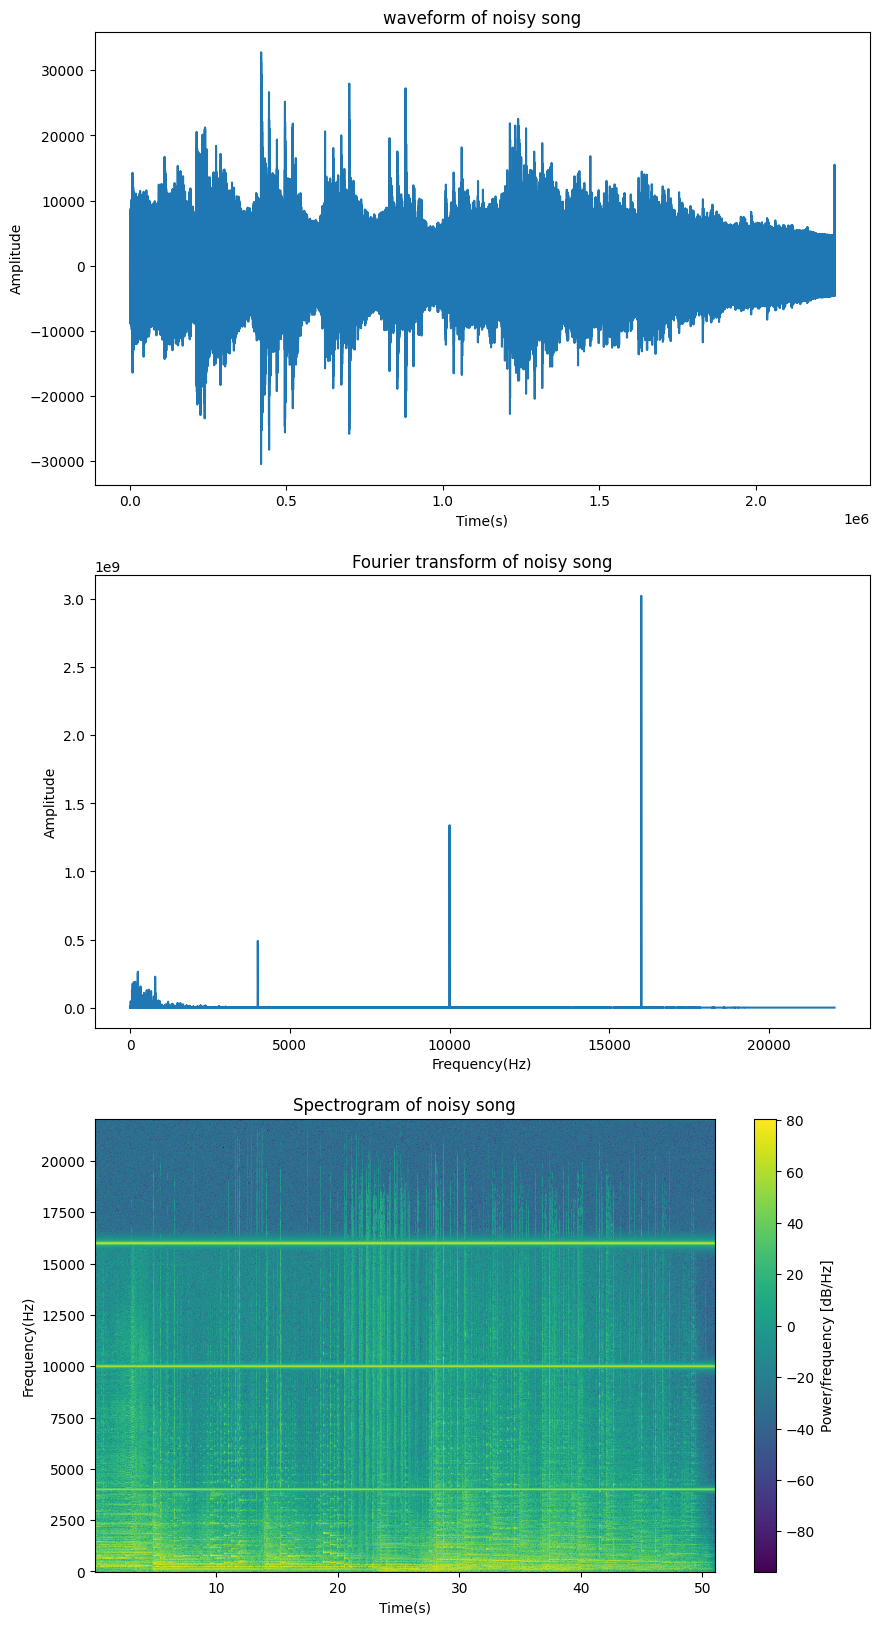

In [4]:
norm_data = np.int16((data / data.max()) * 32767)
plotAll(sampling_rate, norm_data, "noisy")

In [5]:
# calculate fourier transform of a real signal
yf = rfft(norm_data)
xf = rfftfreq(len(norm_data), 1/sampling_rate)

target_freq1 = 4000
# finding index of target_freq
index1 = np.abs(xf - target_freq1).argmin()
yf[index1-50: index1+50] = 0

target_freq2 = 10000
index2 = np.abs(xf - target_freq2).argmin()
yf[index2-90: index2+90] = 0

target_freq3 = 16000
index3 = np.abs(xf - target_freq3).argmin()
yf[index3-50: index3+50] = 0

# inverse fourier transform
new_sig = irfft(yf)
norm_new_sig = np.int16(new_sig * (32767 / new_sig.max()))

write("clean.wav", sampling_rate, norm_new_sig)

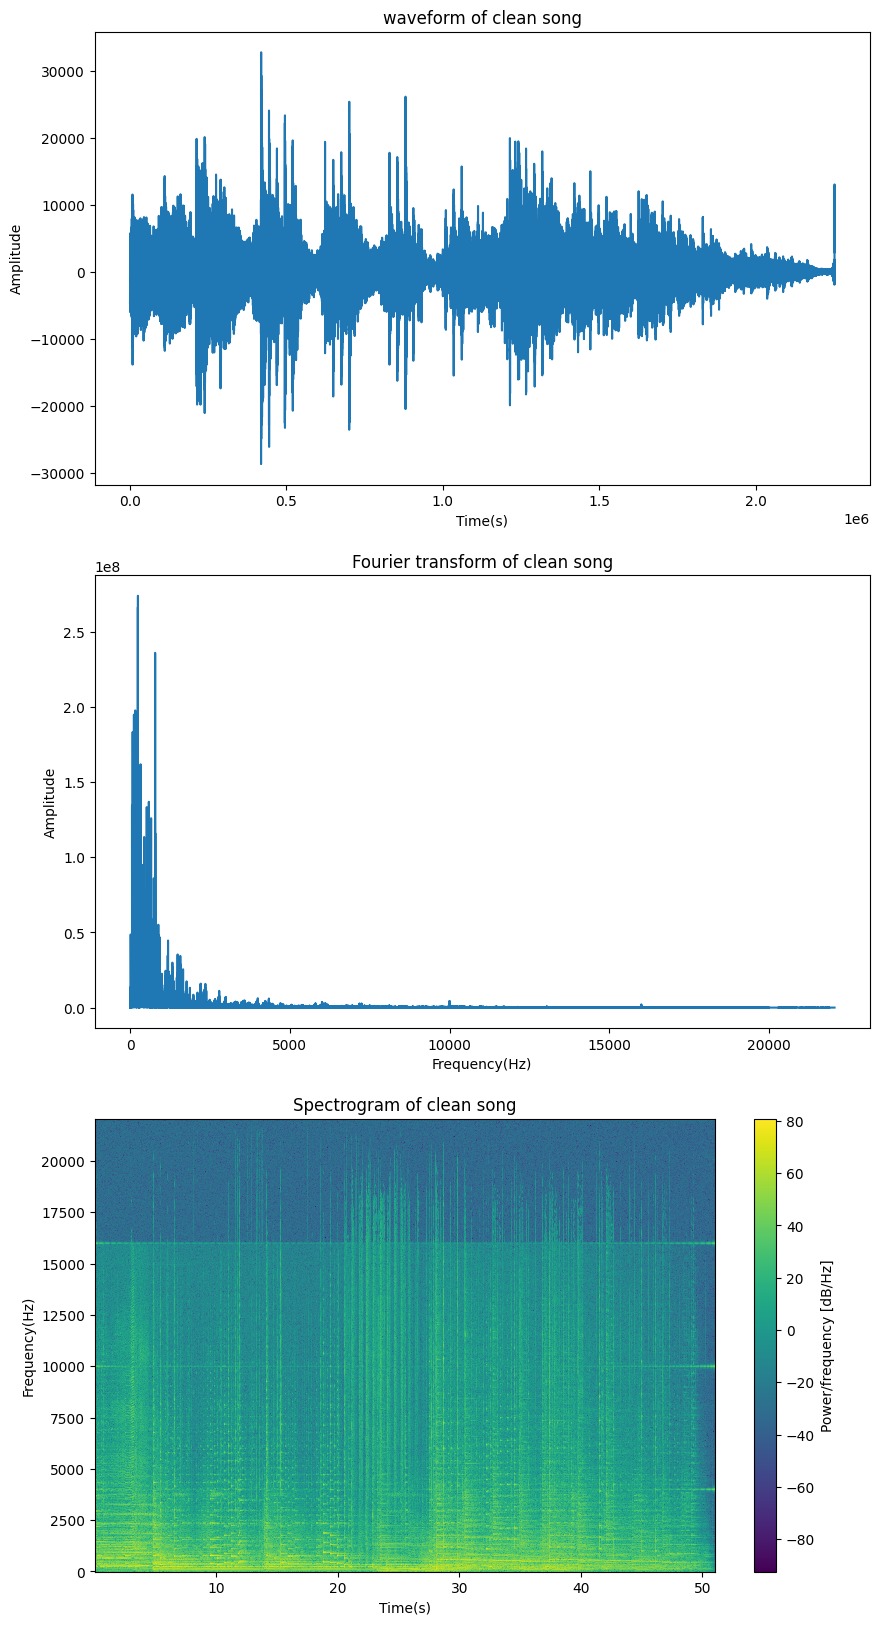

In [6]:
sampling_rate, data = wavfile.read('clean.wav')
plotAll(sampling_rate, data, "clean")

In [7]:
sampling_rate, data = wavfile.read('clean.wav')
fft_data = rfft(data)
frequence = rfftfreq(len(data))
new_freqs = frequence / 2

inversed_data = irfft(fft_data * new_freqs)

inversed_data = irfft(fft_data)

new_data = np.asarray(inversed_data.real, dtype=data.dtype)

wavfile.write('slow.wav', int(sampling_rate / 2), new_data)

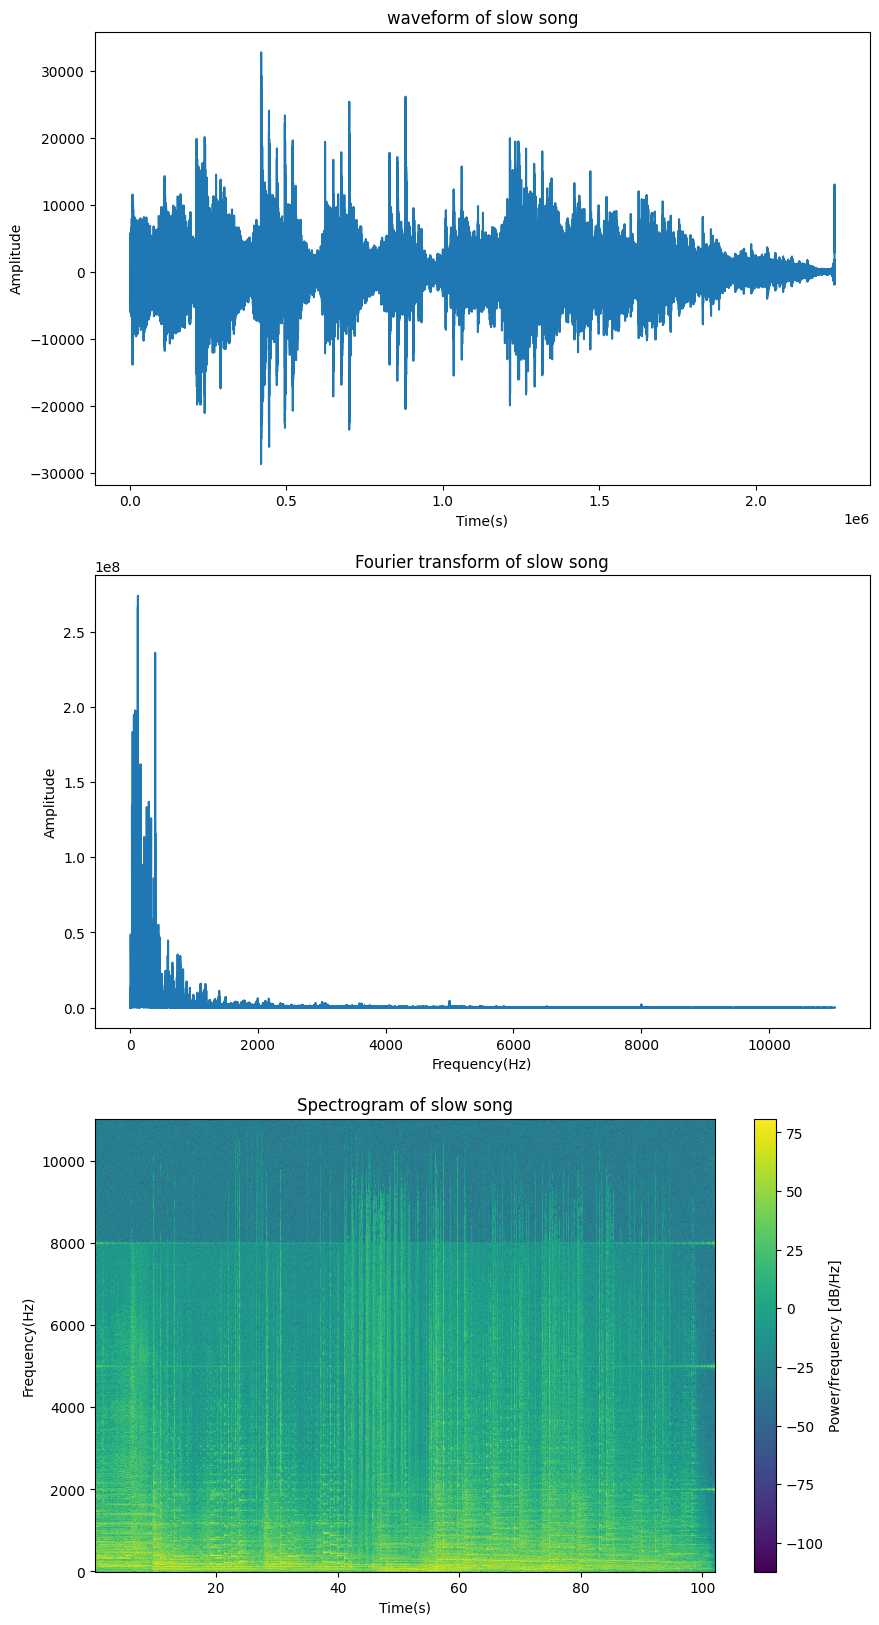

In [8]:
sampling_rate, data = wavfile.read('slow.wav')
plotAll(sampling_rate, data, "slow")

In [9]:
sampling_rate, data = wavfile.read('clean.wav')
fft_data = rfft(data)
frequence = rfftfreq(len(data))
new_freqs = frequence * 2

inversed_data = irfft(fft_data * new_freqs)

inversed_data = irfft(fft_data)

new_data = np.asarray(inversed_data.real, dtype=data.dtype)

wavfile.write('fast.wav', sampling_rate * 2, new_data)


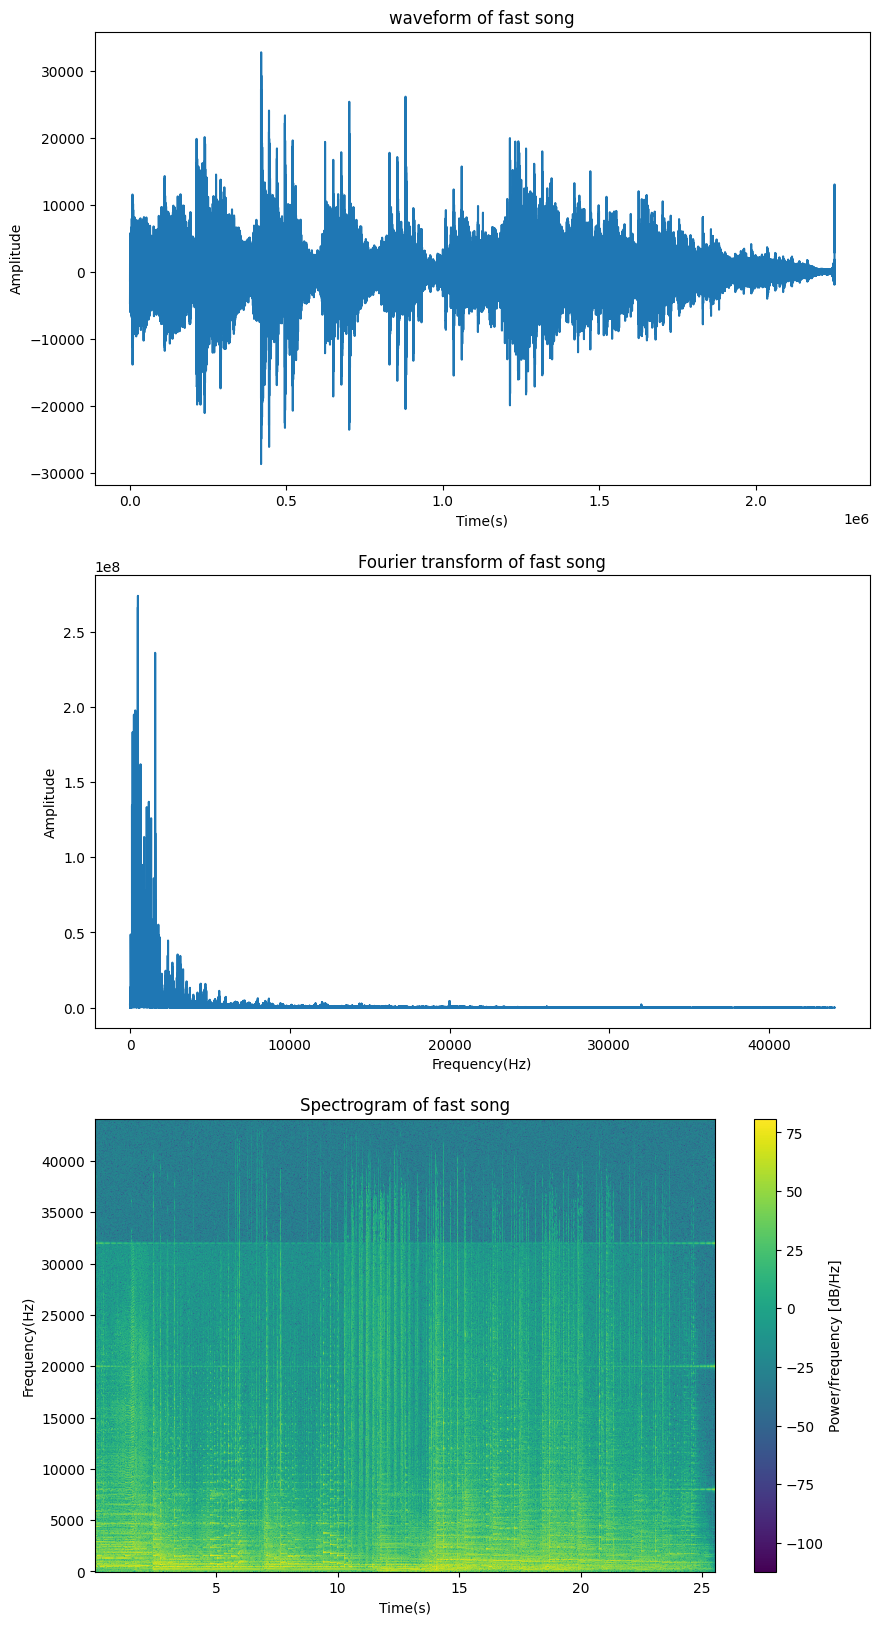

In [10]:
sampling_rate, data = wavfile.read('fast.wav')
plotAll(sampling_rate, data, "fast")